### 압축 데이터 병합

In [1]:
import os
import pandas as pd

In [2]:
data = pd.read_csv('0828_1hz.csv')

In [3]:
data

,Time,x,y,z
0,2023.08.28 01:20:09.446,-0.007947,-0.006819,-0.007171
1,2023.08.28 01:20:10.444,-0.007962,-0.006925,-0.007227
2,2023.08.28 01:20:11.450,-0.007944,-0.006814,-0.007200
3,2023.08.28 01:20:12.452,-0.008017,-0.006852,-0.007244
4,2023.08.28 01:20:13.442,-0.007992,-0.006908,-0.007241
...,...,...,...,...
88522,2023.08.29 01:53:31.131,-0.007976,-0.006834,-0.001624
88523,2023.08.29 01:53:32.134,-0.007836,-0.007055,-0.011875
88524,2023.08.29 01:53:33.124,-0.008005,-0.007104,-0.004726
88525,2023.08.29 01:53:34.122,-0.007799,-0.007007,-0.009391


### 시각화

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

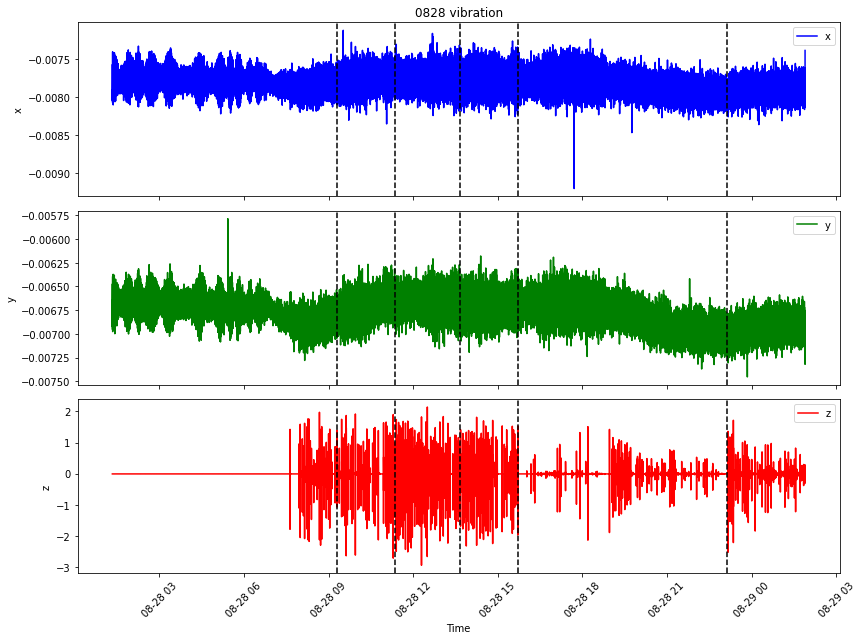

In [5]:
data['Time'] = pd.to_datetime(data['Time'], format='%Y.%m.%d %H:%M:%S.%f')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

ax1.plot(data['Time'], data['x'], label='x', color='blue')
ax1.set_ylabel('x')
ax1.set_title('0828 vibration')
ax1.legend()

ax2.plot(data['Time'], data['y'], label='y', color='green')
ax2.set_ylabel('y')
ax2.legend()

ax3.plot(data['Time'], data['z'], label='z', color='red')
ax3.set_xlabel('Time')
ax3.set_ylabel('z')
ax3.legend()

red_lines = [
    "2023-08-28 23:08:00",
    "2023-08-28 15:42:00",
    "2023-08-28 13:39:00",
    "2023-08-28 11:21:00",
    "2023-08-28 09:17:00"
]

for line in red_lines:
    line_time = pd.to_datetime(line, format='%Y-%m-%d %H:%M:%S')
    ax1.axvline(x=line_time, color='black', linestyle='--')
    ax2.axvline(x=line_time, color='black', linestyle='--')
    ax3.axvline(x=line_time, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
#c['Time'] = pd.to_datetime(c['Time'], format='%Y.%m.%d %H:%M:%S.%f')

target_times = ['2023.08.28 15:42:00.173','2023.08.28 23:08:00.315']

indices = [data.index[data['Time'] == time].tolist() for time in target_times]

for i, index_list in enumerate(indices):
    print(f"{target_times[i]}의 위치: {index_list}")

2023.08.28 15:42:00.173의 위치: [51843]
2023.08.28 23:08:00.315의 위치: [78671]


### Z축 위주로

In [7]:
z = data.drop(['x', 'y'], axis=1)
z

,Time,z
0,2023-08-28 01:20:09.446,-0.007171
1,2023-08-28 01:20:10.444,-0.007227
2,2023-08-28 01:20:11.450,-0.007200
3,2023-08-28 01:20:12.452,-0.007244
4,2023-08-28 01:20:13.442,-0.007241
...,...,...
88522,2023-08-29 01:53:31.131,-0.001624
88523,2023-08-29 01:53:32.134,-0.011875
88524,2023-08-29 01:53:33.124,-0.004726
88525,2023-08-29 01:53:34.122,-0.009391


In [8]:
before_1542 = z.iloc[46843:51843,:]
after_1542 = z.iloc[51843:56843,:]
before_2308 = z.iloc[68815:78671,:]
after_2308 = z.iloc[78671:88527,:]

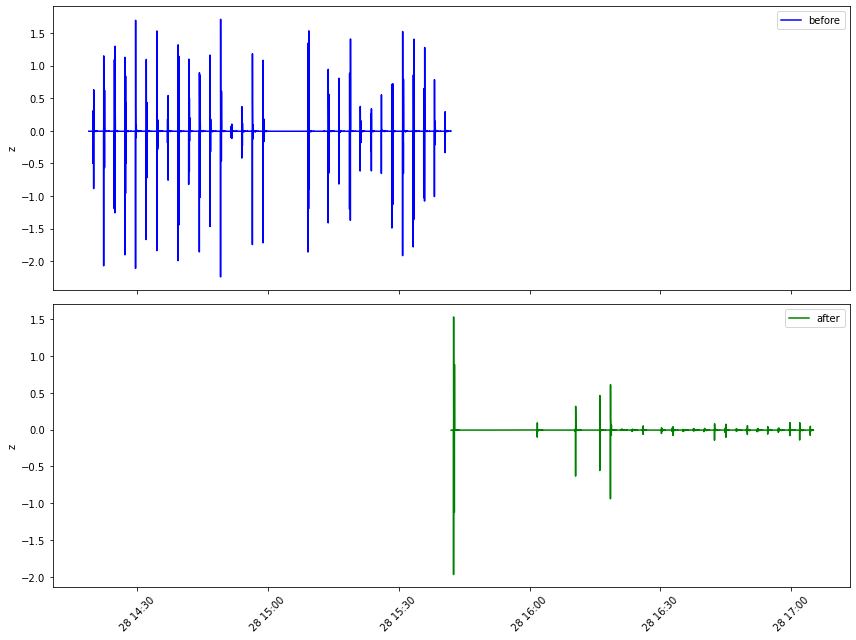

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

ax1.plot(before_1542['Time'], before_1542['z'], label='before', color='blue')
ax1.set_ylabel('z')
ax1.legend()

ax2.plot(after_1542['Time'], after_1542['z'], label='after', color='green')
ax2.set_ylabel('z')
ax2.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

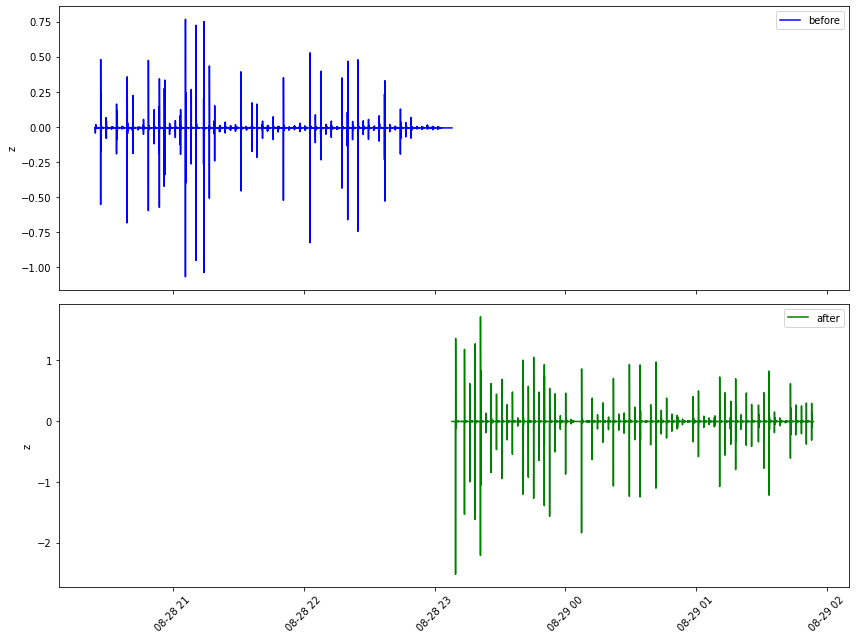

In [10]:
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

ax3.plot(before_2308['Time'], before_2308['z'], label='before', color='blue')
ax3.set_ylabel('z')
ax3.legend()

ax4.plot(after_2308['Time'], after_2308['z'], label='after', color='green')
ax4.set_ylabel('z')
ax4.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
before_1542['z'].describe()

count    5000.000000
mean       -0.007019
std         0.167138
min        -2.241215
25%        -0.007170
50%        -0.007026
75%        -0.006851
max         1.710415
Name: z, dtype: float64

In [12]:
after_1542['z'].describe()

count    5000.000000
mean       -0.007062
std         0.047396
min        -1.967674
25%        -0.007148
50%        -0.007043
75%        -0.006940
max         1.528244
Name: z, dtype: float64

In [13]:
before_2308['z'].describe()

count    9856.000000
mean       -0.007200
std         0.037815
min        -1.067415
25%        -0.007339
50%        -0.007199
75%        -0.007030
max         0.766454
Name: z, dtype: float64

In [14]:
after_2308['z'].describe()

count    9856.000000
mean       -0.007213
std         0.087069
min        -2.520592
25%        -0.007336
50%        -0.007198
75%        -0.007020
max         1.713534
Name: z, dtype: float64

### 상관관계

In [15]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [16]:
xyz = data.iloc[:,1:]
xyz

,x,y,z
0,-0.007947,-0.006819,-0.007171
1,-0.007962,-0.006925,-0.007227
2,-0.007944,-0.006814,-0.007200
3,-0.008017,-0.006852,-0.007244
4,-0.007992,-0.006908,-0.007241
...,...,...,...
88522,-0.007976,-0.006834,-0.001624
88523,-0.007836,-0.007055,-0.011875
88524,-0.008005,-0.007104,-0.004726
88525,-0.007799,-0.007007,-0.009391


In [17]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(xyz), columns=xyz.columns)

print("\nMin-Max Scaling 결과:\n", scaled_df)


Min-Max Scaling 결과:
               x         y         z
0      0.603875  0.380430  0.577265
1      0.596947  0.317037  0.577254
2      0.605240  0.383429  0.577259
3      0.570158  0.361024  0.577250
4      0.582312  0.327261  0.577251
...         ...       ...       ...
88522  0.589872  0.371468  0.578358
88523  0.657116  0.238939  0.576338
88524  0.576000  0.209492  0.577747
88525  0.675039  0.267764  0.576828
88526  0.872661  0.082076  0.575635

[88527 rows x 3 columns]


In [18]:
correlation_matrix = scaled_df.corr(method='pearson')

print("\nPearson 상관계수 행렬:\n", correlation_matrix)


Pearson 상관계수 행렬:
           x         y         z
x  1.000000  0.337871  0.010831
y  0.337871  1.000000  0.008776
z  0.010831  0.008776  1.000000


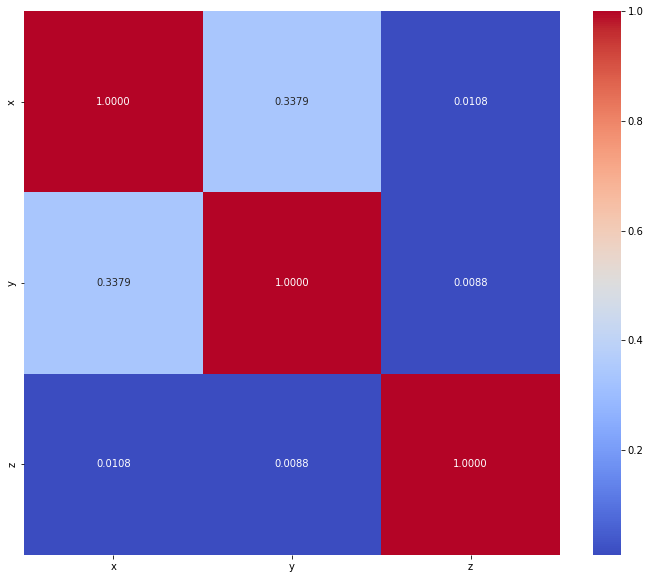

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.show()